Question 1: Given some sample data, write a program to answer the following: click here to access the required data set https://docs.google.com/spreadsheets/d/16i38oonuX1y1g7C_UAmiK9GkY7cS-64DfiDMNiR41LM/edit#gid=0

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

a.Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

b.What metric would you report for this dataset?

c.What is its value?



In [56]:
# import libraries
import pandas as pd
import numpy as np

# plotting 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style

%matplotlib inline


In [113]:
url = "./data/2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv"
df = pd.read_csv(url)

In [58]:
df.shape

(5000, 7)

In [59]:
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [61]:
df.dtypes

order_id           int64
shop_id            int64
user_id            int64
order_amount       int64
total_items        int64
payment_method    object
created_at        object
dtype: object

In [62]:
df.isnull().sum()

order_id          0
shop_id           0
user_id           0
order_amount      0
total_items       0
payment_method    0
created_at        0
dtype: int64

In [114]:
df['order_amount'].describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

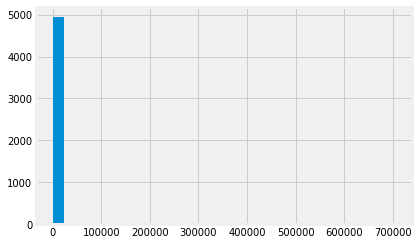

In [72]:
df['order_amount'].hist(bins=30)

In [64]:
df['order_amount'].sort_values(ascending=False)

3332    704000
520     704000
1362    704000
1562    704000
2153    704000
         ...  
4932        90
4923        90
4760        90
3871        90
158         90
Name: order_amount, Length: 5000, dtype: int64

In [71]:
df['order_amount'][df['order_amount'] < 1064].sort_values(ascending=False)

938     1056
3513    1056
2987    1056
3077     980
2494     965
        ... 
322       90
2092      90
158       90
590       90
4923      90
Name: order_amount, Length: 4932, dtype: int64

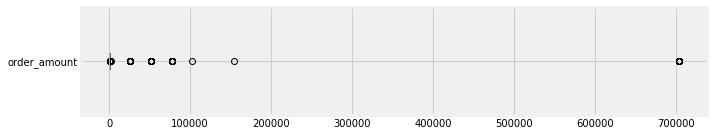

In [73]:
df['order_amount'].plot(kind='box',figsize=(10,2),vert = False)

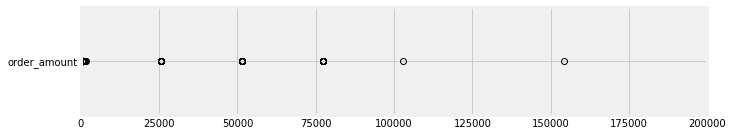

In [74]:
df['order_amount'].plot(kind='box',xlim=(0, 200000),figsize=(10,2),vert = False)

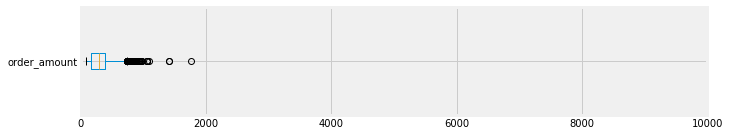

In [75]:
df['order_amount'].plot(kind='box',xlim=(0, 10000),figsize=(10,2),vert = False)

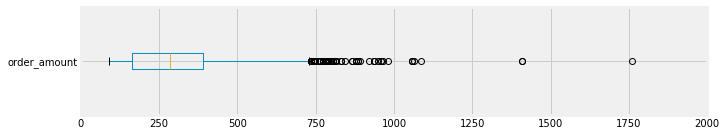

In [76]:
df['order_amount'].plot(kind='box',xlim=(0, 2000),figsize=(10,2),vert = False)

In [77]:
df_outlier = df[df['order_amount'] > 2000]
df_outlier.shape

(63, 7)

In [78]:
df_clean = df[df['order_amount'] <2000]
df_clean.shape

(4937, 7)

In [79]:
df_clean.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000
mean,2499.551347,49.846465,849.752279,302.580514,1.994734
std,1444.069407,29.061131,86.840313,160.804912,0.982821
min,1.000000,1.000000,700.000000,90.000000,1.000000
25%,1248.000000,24.000000,775.000000,163.000000,1.000000
50%,2497.000000,50.000000,850.000000,284.000000,2.000000
75%,3751.000000,74.000000,925.000000,387.000000,3.000000
max,5000.000000,100.000000,999.000000,1760.000000,8.000000


In [80]:
df_clean.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


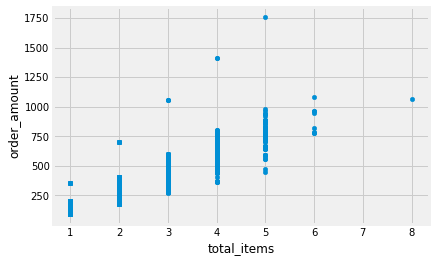

In [85]:
df_clean.plot.scatter( 'total_items','order_amount');

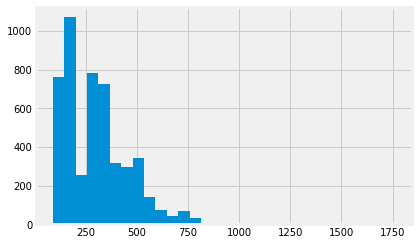

In [97]:
plt.hist(df_clean['order_amount'], bins = 30)
plt.show()

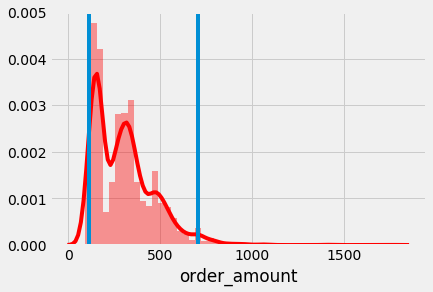

In [98]:
style.use('fivethirtyeight')
sample = df_clean['order_amount']
ax = sns.distplot(sample, color='r')
ax.axvline(np.percentile(sample,97.5),0)
ax.axvline(np.percentile(sample,2.5),0)

In [103]:
df_clean = df[(df['order_amount'] < 750) & (df['order_amount'] > 80)]
df_clean.shape

(4872, 7)

In [105]:
df_lt_80 = df[df['order_amount'] < 80]
df_gt_750 = df[df['order_amount'] > 750]
df_lt_80.shape, df_gt_750.shape

((0, 7), (128, 7))

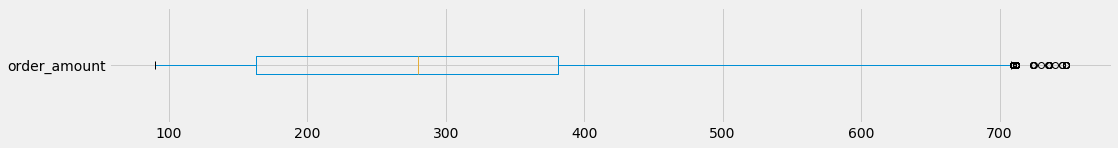

In [108]:
df_clean['order_amount'].plot(kind='box',figsize=(16,2),vert = False)

In [109]:
df_clean.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [110]:
df_clean['order_amount'].sort_values()

2092     90
3200     90
4923     90
3871     90
4932     90
       ... 
651     748
3202    748
4574    748
4580    748
4596    748
Name: order_amount, Length: 4872, dtype: int64

In [112]:
df_clean.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,4872.000000,4872.000000,4872.000000,4872.000000,4872.000000
mean,2499.448481,49.802750,849.962644,294.912151,1.956486
std,1443.388353,29.067635,86.874433,146.104841,0.926887
min,1.000000,1.000000,700.000000,90.000000,1.000000
25%,1246.750000,24.000000,776.000000,163.000000,1.000000
50%,2500.500000,50.000000,850.000000,280.000000,2.000000
75%,3751.250000,74.000000,925.000000,381.000000,3.000000
max,5000.000000,100.000000,999.000000,748.000000,5.000000


In [111]:
df_clean['order_amount'].mean()

294.91215106732346

In [ ]:
Question 2: For this question you’ll need to use SQL.
Follow this link to access the data set required for the challenge.
Please use queries to answer the following questions. 
Paste your queries along with your final numerical answers below.

How many orders were shipped by Speedy Express in total?
What is the last name of the employee with the most orders?
What product was ordered the most by customers in Germany?



In [ ]:
a.How many orders were shipped by Speedy Express in total?


In [ ]:
SELECT count(orderid) as Total_Orders
FROM orders as O
inner join shippers as S
on O.shipperid = S.ShipperID
where S.ShipperName == 'Speedy Express';


In [ ]:
Total_Orders
54

In [ ]:
b.What is the last name of the employee with the most orders?



In [ ]:
SELECT Last_Name_Employee from (
SELECT E.LastName as Last_Name_Employee, count(orderid) as tot_num
FROM orders as O 
inner join employees as E
on O.employeeID = E.employeeID
group by O.employeeID
order by tot_num DESC
limit 1 );


In [ ]:
Last_Name_Employee
Peacock

In [ ]:
c.What product was ordered the most by customers in Germany?

In [ ]:
orders
-------
OrderID	CustomerID	EmployeeID	OrderDate	ShipperID

customers
---------
CustomerID	
CustomerName	
ContactName	Address	City	PostalCode	Country

products
--------
ProductID	ProductName	SupplierID	CategoryID	Unit	Price

orderdetails
-----------
OrderDetailID	OrderID	ProductID	Quantity



In [ ]:
SELECT * from customers
where Country ='Germany';

In [ ]:
SELECT productid, sum(quantity) as tot 
from orderdetails
group by productid
order by tot DESC
limit 1;

In [ ]:
# join orders,customers,orderdetails and products

SELECT Product_Name from (
SELECT OD.productid,sum(OD.quantity) as tot,productname as Product_Name,country 
from orders as O
inner join customers as C
on O.customerID = C.customerID
inner join orderdetails as OD
on O.orderid = OD.orderid
inner join products as P
on OD.productID = P.productID
where C.country = 'Germany'
group by OD.productid
order by tot DESC
limit 1
);

Product_Name
Boston Crab Meat